# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
!pip install citipy

    100% |████████████████████████████████| 563kB 3.3MB/s ta 0:00:01
  Stored in directory: /Users/nehemias/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
np.random.seed(seed=555)

In [37]:
list_o_randoms = [np.random.uniform() for _ in range(100)]
list_o_randoms

[0.7178340874802498,
 0.047855132556195557,
 0.9444719775937772,
 0.6863800396919426,
 0.5812073341927951,
 0.14267861602830445,
 0.9459191809574766,
 0.33999058662873616,
 0.6204354581658499,
 0.4529596444285833,
 0.23976741960089143,
 0.03450459092015734,
 0.14859311299528433,
 0.8108661744525073,
 0.6531053764282377,
 0.5444686851846569,
 0.041194765454177884,
 0.46816625120466293,
 0.8887467325205721,
 0.4762585574315209,
 0.4124889836695087,
 0.6161065377647801,
 0.32141655414158066,
 0.5808692628105661,
 0.39661405034373876,
 0.020091368373931773,
 0.43139589787738464,
 0.41124451216295765,
 0.6290617468955096,
 0.5025218939501055,
 0.16212784037298456,
 0.6668970613203441,
 0.13527229070843116,
 0.16993753607245665,
 0.22083031322638458,
 0.08667047501422154,
 0.04684006886258707,
 0.028908051277939384,
 0.4386796201143828,
 0.8085650642896128,
 0.6133624554507586,
 0.6609722198958361,
 0.9286221214858503,
 0.48734575451122,
 0.6381785213686786,
 0.1850938207922248,
 0.250653770

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
City = [];
Cloudiness = [];
Country = [];
Date = [];
Humidity = [];
Lat = [];
Lng = [];
Max_Temp = [];
Wind_Speed = [];
j = 1;
i = 1;
units = "imperial";
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    if j <= 50:
        try:
                url = "http://api.openweathermap.org/data/2.5/weather?"
                query_url = f"{url}appid={api_key}&units={units}&q={city}"
                responce = requests.get(query_url).json()
                City.append(responce["name"])
                Cloudiness.append(responce["clouds"]['all'])
                Country.append(responce["sys"]["country"])
                Date.append(responce["dt"])
                Humidity.append(responce["main"]["humidity"])
                Lat.append(responce["coord"]["lat"])
                Lng.append(responce["coord"]["lon"])
                Max_Temp.append(responce["main"]["temp_max"])
                Wind_Speed.append(responce["wind"]["speed"])
                print(f"Processing Record {j} of Set {i} | {city}")
                j = j + 1;
        except:
                print("City not found. Skipping...")
                j = j + 1;
                continue
    else: 
            j = 1;
            i = i + 1; 
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | namie
Processing Record 3 of Set 1 | miquelon
Processing Record 4 of Set 1 | ipixuna
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | lakatoro
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | broome
Processing Record 10 of Set 1 | chapais
Processing Record 11 of Set 1 | kruisfontein
Processing Record 12 of Set 1 | antofagasta
Processing Record 13 of Set 1 | mumias
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | buala
Processing Record 17 of Set 1 | provideniya
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | san andres
Processing Record 20 of Set 1 | bluff
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | lyuban
Processing Record 23 of Set 1 | klaksvik
Process

Processing Record 9 of Set 5 | gandajika
Processing Record 10 of Set 5 | ambon
Processing Record 11 of Set 5 | longyearbyen
City not found. Skipping...
Processing Record 13 of Set 5 | pasni
City not found. Skipping...
Processing Record 15 of Set 5 | zhoucheng
City not found. Skipping...
Processing Record 17 of Set 5 | cockburn town
Processing Record 18 of Set 5 | pokhara
Processing Record 19 of Set 5 | charters towers
Processing Record 20 of Set 5 | broken hill
Processing Record 21 of Set 5 | berlevag
Processing Record 22 of Set 5 | lokosovo
Processing Record 23 of Set 5 | la palma
Processing Record 24 of Set 5 | presidencia roque saenz pena
Processing Record 25 of Set 5 | morondava
Processing Record 26 of Set 5 | fortuna
Processing Record 27 of Set 5 | tura
Processing Record 28 of Set 5 | buraydah
Processing Record 29 of Set 5 | blagoyevo
Processing Record 30 of Set 5 | khatanga
Processing Record 31 of Set 5 | kuytun
City not found. Skipping...
Processing Record 33 of Set 5 | isangel


Processing Record 14 of Set 9 | sinaloa
Processing Record 15 of Set 9 | tabou
Processing Record 16 of Set 9 | ancud
Processing Record 17 of Set 9 | tuatapere
Processing Record 18 of Set 9 | sturgeon bay
Processing Record 19 of Set 9 | spornoye
Processing Record 20 of Set 9 | jega
Processing Record 21 of Set 9 | cervo
Processing Record 22 of Set 9 | tahoua
Processing Record 23 of Set 9 | kaitangata
Processing Record 24 of Set 9 | vao
Processing Record 25 of Set 9 | new bedford
Processing Record 26 of Set 9 | derzhavinsk
Processing Record 27 of Set 9 | honningsvag
Processing Record 28 of Set 9 | bilma
Processing Record 29 of Set 9 | tooele
Processing Record 30 of Set 9 | qinzhou
Processing Record 31 of Set 9 | idar
Processing Record 32 of Set 9 | severo-yeniseyskiy
Processing Record 33 of Set 9 | esso
Processing Record 34 of Set 9 | pacific grove
Processing Record 35 of Set 9 | namibe
Processing Record 36 of Set 9 | gigmoto
Processing Record 37 of Set 9 | carnarvon
Processing Record 38 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
raw_data = {"City":City,
            "Cloudiness": Cloudiness,
            "Country": Country, 
            "Date": Date, 
            "Humidity": Humidity, 
            "Lat": Lat, 
            "Lng": Lng, 
            "Max Temp": Max_Temp, 
            "Wind Speed":Wind_Speed}

df = pd.DataFrame(raw_data)
file = df.to_csv('city.csv')
df.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [8]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,80,NZ,1562433196,85,-46.19,168.86,42.34,14.56
1,Namie,100,JP,1562433536,66,37.52,140.86,66.00,9.69
2,Miquelon,0,PM,1562433537,82,47.10,-56.38,57.20,4.70
3,Ipixuna,40,BR,1562433537,66,-1.76,-48.80,87.80,5.82
4,Vaini,98,IN,1562433537,86,15.34,74.49,78.34,11.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

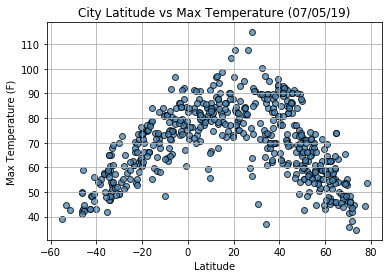

In [9]:
x_label = list(df["Lat"])
y_label = list(df["Max Temp"])
plt.scatter(x_label, y_label, c="steelblue",edgecolor = "black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (07/05/19)")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

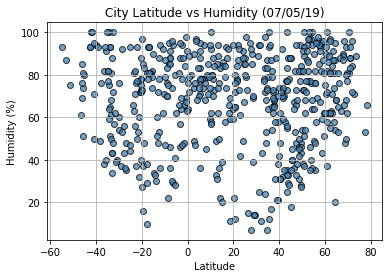

In [11]:
x_label = list(df["Lat"])
y_label = list(df["Humidity"])
plt.scatter(x_label, y_label, c="steelblue",edgecolor = "black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (07/05/19)")
plt.grid(True)
plt.show()


#### Latitude vs. Cloudiness Plot

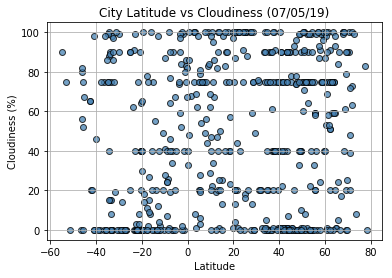

In [12]:
x_label = list(df["Lat"])
y_label = list(df["Cloudiness"])
plt.scatter(x_label, y_label, c="steelblue",edgecolor = "black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (07/05/19)")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

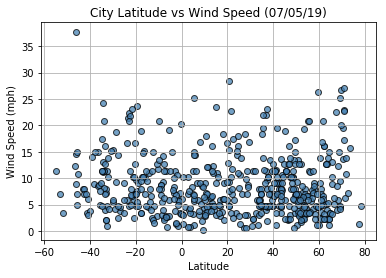

In [13]:
x_label = list(df["Lat"])
y_label = list(df["Wind Speed"])
plt.scatter(x_label, y_label, c="steelblue",edgecolor = "black", alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (07/05/19)")
plt.grid(True)
plt.show()